   sepal length sepal width petal length petal width            class
0           5.1         3.5          1.4         0.2      Iris-setosa
1           4.9         3.0          1.4         0.2      Iris-setosa
2           4.7         3.2          1.3         0.2      Iris-setosa
3           4.6         3.1          1.5         0.2      Iris-setosa
4           5.0         3.6          1.4         0.2      Iris-setosa
..          ...         ...          ...         ...              ...
95          5.7         3.0          4.2         1.2  Iris-versicolor
96          5.7         2.9          4.2         1.3  Iris-versicolor
97          6.2         2.9          4.3         1.3  Iris-versicolor
98          5.1         2.5          3.0         1.1  Iris-versicolor
99          5.7         2.8          4.1         1.3  Iris-versicolor

[100 rows x 5 columns]


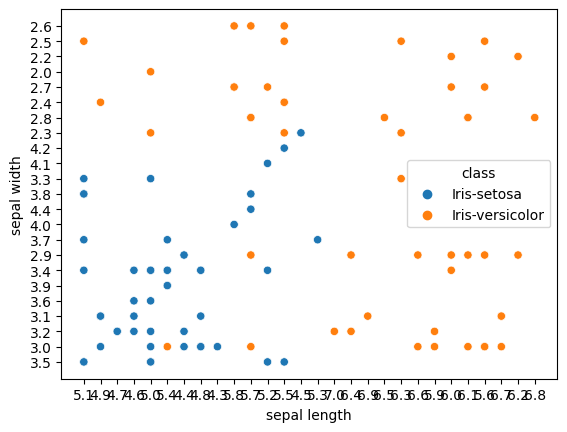

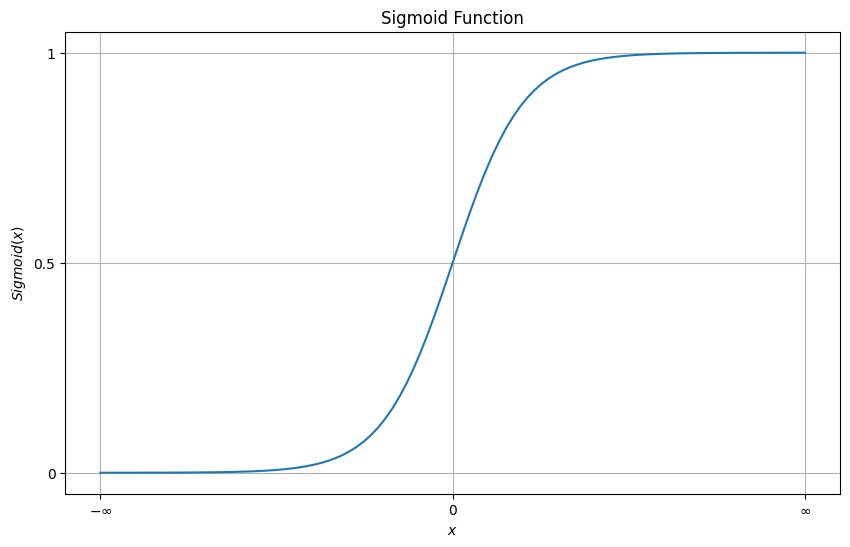

In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

with open("iris_2.csv", newline="") as file:
    irisData = csv.reader(file)
    irisDF = pd.DataFrame(irisData)

irisDF.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]

print(irisDF)

g = sns.scatterplot(x="sepal length", y="sepal width", hue="class", data=irisDF)

g.figure.axes[0].invert_yaxis()
plt.show()



X = irisDF[["sepal length", "sepal width"]]
y = irisDF["class"]

def sigmoid(x):
    return 1/ (1+np.exp(-x))

x_arr = np.linspace(-10, 10 ,100)
y_arr = np.array(list(map(sigmoid, x_arr)))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_arr, y_arr)
ax.set_xticks([-10, 0 ,10], ["$-\infty$", "0", "$\infty$"])
ax.set_yticks([0, 0.5, 1], ["0", "0.5", "1"])
ax.set_xlabel("$x$")
ax.set_ylabel("$Sigmoid(x)$")
ax.set_title("Sigmoid Function")

ax.grid()
plt.show()


In [21]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

In [23]:
logR= LogisticRegression (random_state=0)
logR.get_params ()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
logR. fit (x_train, y_train)
logR.score (x_train, y_train )

1.0

In [25]:
logR.coef_

array([[ 2.84820506, -2.74516787]])

In [26]:
logR.intercept_

array([-6.93008565])

In [27]:
def fun ( x1, x2 ):
    return 2.47337199 * x1 + 1.03289823 * x2 -7.44987506

In [28]:
def sigmoid_new( x1, x2 ):
    return 1 / (1 + np.exp(-(fun( x1, x2))))

In [29]:
x_train.head(6)

,sepal length,sepal width
17,5.1,3.5
54,6.5,2.8
83,6.0,2.7
49,5.0,3.3
80,5.5,2.4
53,5.5,2.3


In [30]:
outFunYList = []
outSigmoidYList = []
test_List=[[4.9,3.1],
           [5.1,3.5],
           [5.2,3.5]]
for i in test_List:
    outFunYList.append( fun(i[0], i[1]) )
    outSigmoidYList.append( sigmoid_new (i[0], i[1]) )
    print (fun (i[0], i[1]),"\t", sigmoid_new(i[0], i[1]))

7.871632204000001 	 0.9996187341063291
8.779465893999998 	 0.9998461634283972
9.026803093000002 	 0.9998798684579447
